Code to generate an artifical dataset in order to test our solution

#10 nodes
Sin function with 1 day period, 1 sample every min

#1 Reference Stations: 
Sin function with 1 day period, 1 sample every hour

01/05/2021 

In [1]:
import pandas as pd
#import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
start_time ="2021-10-03 00:00:00"
end_time   ="2021-10-03 23:59:00"

In [2]:
CC_datetime = pd.DataFrame(pd.date_range(start_time,end_time, freq='1Min'),columns=["fechaHora"])
SS_datetime = pd.DataFrame(pd.date_range(start_time,end_time, freq='1H'),columns=["Fecha_Hora"])

In [3]:
period_SS=len(SS_datetime)
amplitude=20
samples_SS=len(SS_datetime)

period_CC=len(CC_datetime)
amplitude=20
samples_CC=len(CC_datetime)

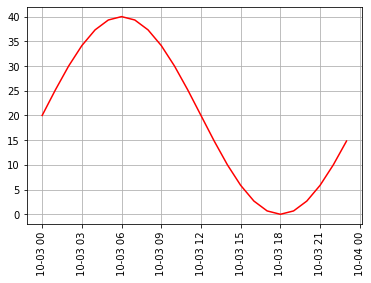

In [55]:
#np.sin(11*2*np.pi/period)
dataset_SS=[]
for x in range(0,period_SS):
    dataset_SS+=[[x,amplitude*(1+np.sin(x*2*np.pi/period_SS))]]



dataset_SS=np.array(dataset_SS)
#plt.plot(dataset_SS[:,0],dataset_SS[:,1],"o")
#plt.show()
SS_datetime["pm25_df"]=dataset_SS[:,1]


plt.plot(SS_datetime["Fecha_Hora"],SS_datetime["pm25_df"],"r-")
plt.xticks(rotation=90)
plt.grid()

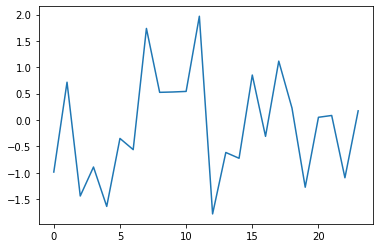

In [35]:
n = len(SS_datetime)
mean = 0; std = 1
#plt.plot(np.random.normal(0, 1, size=n))

np.random.seed(0)
SS_datetime["random"]=np.random.normal(mean, std, size=n)+SS_datetime["pm25_df"]
SS_datetime

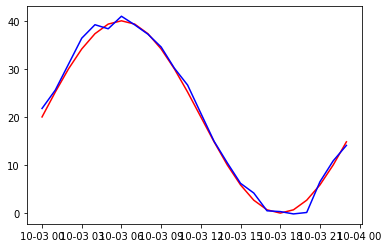

In [49]:
plt.plot(SS_datetime["Fecha_Hora"],SS_datetime["pm25_df"],"r-")
plt.plot(SS_datetime["Fecha_Hora"],SS_datetime["random"],"b-")

Generating Reference Data

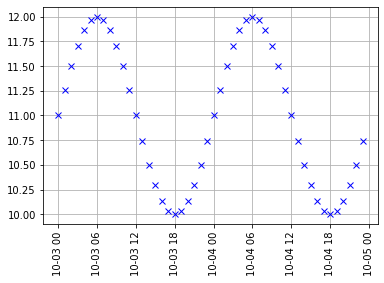

In [36]:
#header_SS=["Fecha_Hora","codigoSerial","pm25","calidad_pm25","pm10","calidad_pm10"]
start_time ="2021-10-03 00:00:00"
end_time   ="2021-10-04 23:59:00"
#SS_dataset = pd.DataFrame(pd.date_range(start_time,end_time, freq='1H'),columns=["Fecha_Hora"])

header_SS=["Fecha_Hora","codigoSerial","pm25","calidad_pm25","pm10","calidad_pm10"]
SS_dataset=pd.DataFrame(columns=header_SS)
SS_dataset.Fecha_Hora=pd.date_range(start_time,end_time, freq='1H')


period_SS=len(SS_dataset)
amplitude=10

values_SS=[]
for x in range(0,period_SS):
    values_SS+=[[x,amplitude*(1.1+0.1*np.sin(2*x*2*np.pi/period_SS))]]

values_SS=np.array(values_SS)
SS_dataset["codigoSerial"]=1
SS_dataset["pm25"]=values_SS[:,1]
SS_dataset.to_csv("C:/Users/julio/Documents/UDEA/Maestría/DQ in IOT/Datasets/Dataset for testing/Synthetic/"+"SS_Synthetic.csv",header=False,index=False)


plt.plot(SS_dataset["Fecha_Hora"],SS_dataset["pm25"],"bx")
plt.xticks(rotation=90)
plt.grid()

#SS_dataset

Generating one sensor data

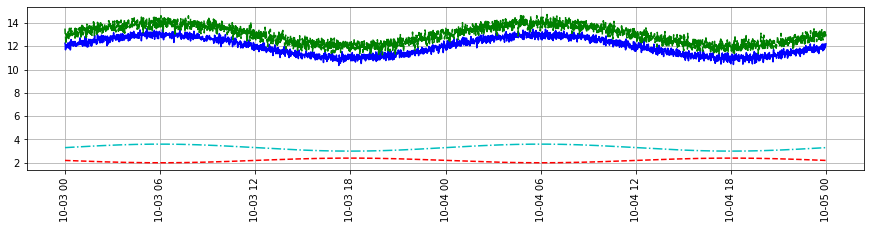

In [72]:
#    header_CC=["codigoSerial", "fecha", "hora", "fechaHora", "temperatura", "humedad_relativa", "pm1_df", "pm10_df", "pm25_df", "pm1_nova", "pm10_nova", "pm25_nova", "calidad_temperatura", "calidad_humedad_relativa", "calidad_pm1_df", "calidad_pm10_df", "calidad_pm25_df", "calidad_pm1_nova", "calidad_pm10_nova", "calidad_pm25_nova"]

start_time ="2021-10-03 00:00:00"
end_time   ="2021-10-04 23:59:00"
CC_dataset = pd.DataFrame(pd.date_range(start_time,end_time, freq='1Min'),columns=["fechaHora"])

period_CC=len(CC_dataset)
amplitude=10

n = len(CC_dataset)
mean = 0; std = 1
#CC=pd.DataFrame(columns=['codigoSerial',"fechaHora", 'pm25_df', 'pm25_nova', 'temperatura', 'humedad_relativa'])
header_CC=["codigoSerial", "fecha", "hora", "fechaHora", "temperatura", "humedad_relativa", "pm1_df", "pm10_df", "pm25_df", "pm1_nova", "pm10_nova", "pm25_nova", "calidad_temperatura", "calidad_humedad_relativa", "calidad_pm1_df", "calidad_pm10_df", "calidad_pm25_df", "calidad_pm1_nova", "calidad_pm10_nova", "calidad_pm25_nova"]
CC=pd.DataFrame(columns=header_CC)
for node in range (1,11):
    #print(node)
    values_CC=[]
    for x in range(0,period_CC):
        
        pm25_df=             amplitude*(1.2+0.1*np.sin(2*x*2*np.pi/period_CC))
        pm25_nova=           amplitude*(1.3+0.1*np.sin(2*x*2*np.pi/period_CC))
        temperatura=     0.2*amplitude*(1.1-0.1*np.sin(2*x*2*np.pi/period_CC))
        humedad_relativa=0.3*amplitude*(1.1+0.1*np.sin(2*x*2*np.pi/period_CC))
        #print(humedad_relativa)
        #print([[x,pm25_df,pm25_nova,temperatura,humedad_relativa]])
        values_CC+=[[x,pm25_df,pm25_nova,temperatura,humedad_relativa]]
    
    values_CC=np.array(values_CC)
   
    np.random.seed(node)
    CC_dataset["pm25_df"]=values_CC[:,1]+np.random.normal(mean, 0.2*std, size=n)
    np.random.seed(node+1)
    CC_dataset["pm25_nova"]=values_CC[:,2]+np.random.normal(mean, 0.3*std, size=n)
    CC_dataset["temperatura"]=values_CC[:,3]
    CC_dataset["humedad_relativa"]=values_CC[:,4]
    CC_dataset["codigoSerial"]=node
    CC=CC.append(CC_dataset, ignore_index = True)
        

CC.to_csv("C:/Users/julio/Documents/UDEA/Maestría/DQ in IOT/Datasets/Dataset for testing/Synthetic/"+"CC_Synthetic.csv",header=False,index=False)

#C:\Users\julio\Documents\UDEA\Maestría\DQ in IOT\Datasets\Dataset for testing\Synthetic

plt.figure(figsize=(15,3))
plt.plot(CC_dataset["fechaHora"],CC_dataset["pm25_df"],"b-")
plt.plot(CC_dataset["fechaHora"],CC_dataset["pm25_nova"],"g--")
plt.plot(CC_dataset["fechaHora"],CC_dataset["temperatura"],"r--")
plt.plot(CC_dataset["fechaHora"],CC_dataset["humedad_relativa"],"c-.")
plt.xticks(rotation=90)
plt.grid()
#CC

GENERATE A SYNTHETIC DATASET BASED ON REAL DATA.

DATA FOR THE REFERENCE STATION

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime, timedelta
import datetime

start_time ="2021-10-05 00:00:00"
end_time   ="2021-10-08 00:00:00"

header_SS=["Fecha_Hora","codigoSerial","pm25","calidad_pm25","pm10","calidad_pm10"]
datatypes_SS={"codigoSerial":np.uint16,"pm25":np.float32,"pm10":np.float32}
df_SS = pd.read_csv("C:/Users/julio/Documents/UDEA/Maestría/DQ in IOT/Datasets/Dataset for testing/Synthetic/"+"SS_Synthetic_2.csv", header=None,names=header_SS, usecols=header_SS , dtype=datatypes_SS,parse_dates=["Fecha_Hora"], 
            dayfirst=True)


           Fecha_Hora  codigoSerial       pm25  calidad_pm25    pm10  \
0 2021-10-05 00:00:00            90  39.364700             1 -9999.0   
1 2021-10-05 01:00:00            90  41.811199             1 -9999.0   
2 2021-10-05 02:00:00            90  40.623901             1 -9999.0   
3 2021-10-05 03:00:00            90  50.249100             1 -9999.0   
4 2021-10-05 04:00:00            90  43.070202             1 -9999.0   

   calidad_pm10                 Time  
0             1  2021-10-05 00:00:00  
1             1  2021-10-05 01:00:00  
2             1  2021-10-05 02:00:00  
3             1  2021-10-05 03:00:00  
4             1  2021-10-05 04:00:00  


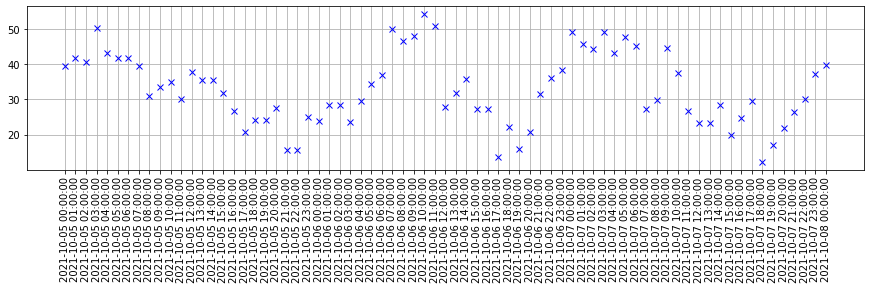

In [2]:
df_SS["Time"] = [d.strftime('%Y-%m-%d %H:%M:%S') for d in df_SS['Fecha_Hora']]
plt.figure(figsize=(15,3))
#plt.plot(df_SS["pm25"],"bx")
plt.plot(df_SS["Time"],df_SS["pm25"],"bx")
plt.xticks(rotation=90)
plt.grid()
print(df_SS.head(5))


DATA FOR THE CITIZEN NODE

Empty DataFrame
Columns: [codigoSerial, fecha, hora, fechaHora, temperatura, humedad_relativa, pm1_df, pm10_df, pm25_df, pm1_nova, pm10_nova, pm25_nova, calidad_temperatura, calidad_humedad_relativa, calidad_pm1_df, calidad_pm10_df, calidad_pm25_df, calidad_pm1_nova, calidad_pm10_nova, calidad_pm25_nova]
Index: []
2021-10-05 00:00:00 2021-10-08 00:00:00 73
2021-10-05 00:00:00 2021-10-08 00:00:00 4321


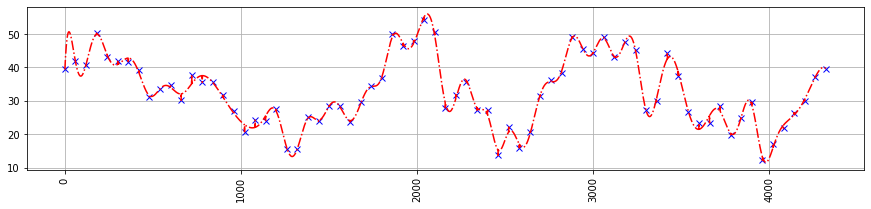

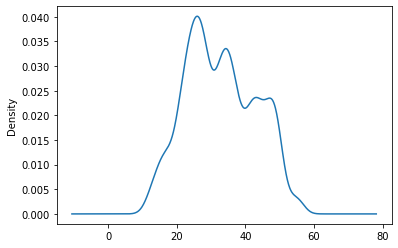

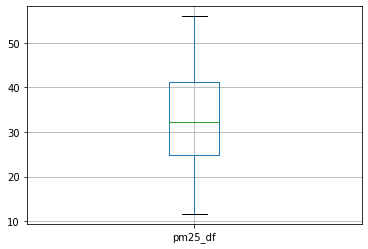

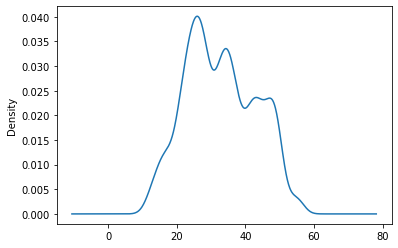

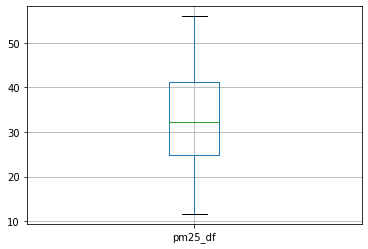

Cantidad de nan:  0
  codigoSerial fecha hora           fechaHora temperatura humedad_relativa  \
0          NaN   NaN  NaN 2021-10-05 00:00:00         NaN              NaN   
1          NaN   NaN  NaN 2021-10-05 00:01:00         NaN              NaN   
2          NaN   NaN  NaN 2021-10-05 00:02:00         NaN              NaN   
3          NaN   NaN  NaN 2021-10-05 00:03:00         NaN              NaN   
4          NaN   NaN  NaN 2021-10-05 00:04:00         NaN              NaN   

  pm1_df pm10_df    pm25_df pm1_nova  ... pm25_nova calidad_temperatura  \
0    NaN     NaN  39.364700      NaN  ...       NaN                 NaN   
1    NaN     NaN  40.490237      NaN  ...       NaN                 NaN   
2    NaN     NaN  41.536592      NaN  ...       NaN                 NaN   
3    NaN     NaN  42.512431      NaN  ...       NaN                 NaN   
4    NaN     NaN  43.420205      NaN  ...       NaN                 NaN   

  calidad_humedad_relativa calidad_pm1_df calidad_pm10_df ca

In [3]:
header_CC=["codigoSerial", "fecha", "hora", "fechaHora", "temperatura", "humedad_relativa", "pm1_df", "pm10_df", "pm25_df", "pm1_nova", "pm10_nova", "pm25_nova", "calidad_temperatura", "calidad_humedad_relativa", "calidad_pm1_df", "calidad_pm10_df", "calidad_pm25_df", "calidad_pm1_nova", "calidad_pm10_nova", "calidad_pm25_nova"]
df_CC=pd.DataFrame(columns=header_CC)
print(df_CC)

df_CC["fechaHora"] = pd.date_range(df_SS.Time.min(),(pd.to_datetime(df_SS.Time.max())+timedelta(minutes=0)).ceil('60min'), freq='1Min')
print(df_SS.Time.min(),df_SS.Time.max(),len(df_SS))
print(df_CC.fechaHora.min(),df_CC.fechaHora.max(),len(df_CC))


for d in df_SS['Time']:
    df_CC.loc[df_CC.fechaHora==d,"pm25"]=df_SS.loc[df_SS.Fecha_Hora==d,"pm25"].values[0]
    #print(df_CC.loc[df_CC.fechaHora==d,"Time"], df_CC.loc[df_CC.fechaHora==d,"pm25_df"])

df_CC.sort_values(by="fechaHora", axis=0, ascending=True, inplace=False, ignore_index=True)
df_CC["pm25_df"]=df_CC.pm25.interpolate(method='spline', axis=0, order=5)


#Both not interpolated and interpolated data plot
plt.figure(figsize=(15,3))
#df_CC["Time"] = [d.strftime('%Y-%m-%d %H:%M:%S') for d in df_CC['fechaHora']]
#plt.plot(df_CC["Time"],df_CC["pm25_df"],"bx")
plt.plot(df_CC["pm25"],"bx")
plt.plot(df_CC["pm25_df"],"r-.")
plt.xticks(rotation=90)
plt.grid()

#Density and boxplot before cleaning
plt.figure()
df_CC["pm25_df"].plot.density()
plt.show()
df_CC.boxplot(["pm25_df"])
df_CC=df_CC.copy()

#CLEANING
Q1 = df_CC['pm25_df'].quantile(0.25)
Q3 = df_CC['pm25_df'].quantile(0.75)
IQR = Q3 - Q1    #IQR is interquartile range. 
df_CC.loc[df_CC["pm25_df"]>=Q3 + 1.5 *IQR,"pm25_df"]=np.nan

plt.figure()
df_CC["pm25_df"].plot.density()
plt.show()
df_CC.boxplot(["pm25_df"])
plt.show()

print("Cantidad de nan: ",np.count_nonzero(np.isnan(df_CC['pm25_df'])))
print(df_CC.head(5))


Get Sample from a real citizen station to build a model to get the temperature and humidity variables based on the PM2.5 concentrations

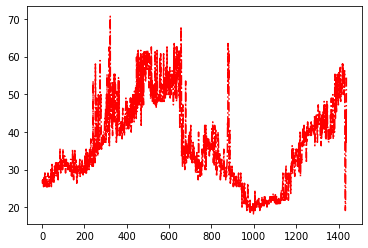

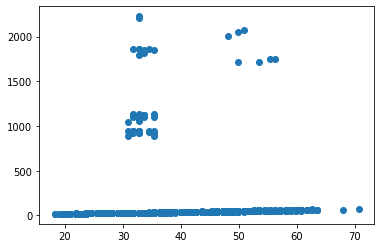

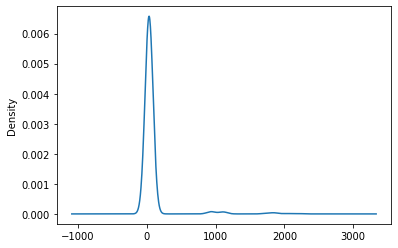

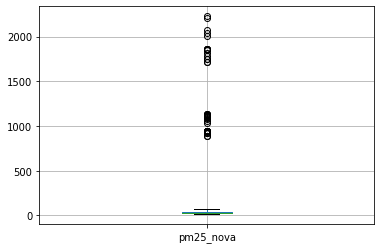

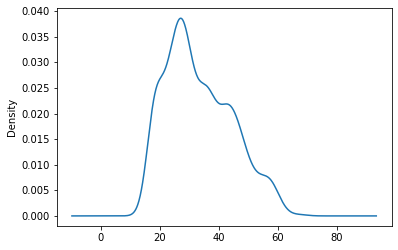

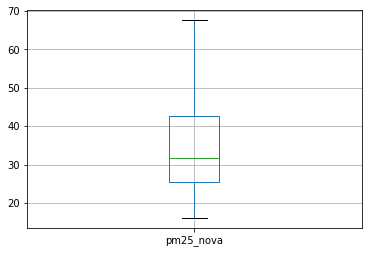

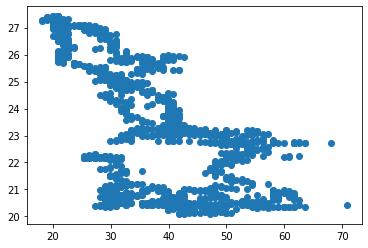

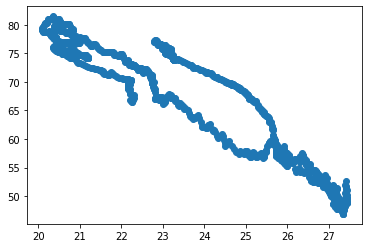

In [4]:
header_CC=["codigoSerial", "fecha", "hora", "fechaHora", "temperatura", "humedad_relativa", "pm1_df", "pm10_df", "pm25_df", "pm1_nova", "pm10_nova", "pm25_nova", "calidad_temperatura", "calidad_humedad_relativa", "calidad_pm1_df", "calidad_pm10_df", "calidad_pm25_df", "calidad_pm1_nova", "calidad_pm10_nova", "calidad_pm25_nova"]
datatypes_CC={"codigoSerial":np.uint16, "temperatura":np.float16, "humedad_relativa":np.float16, "pm1_df":np.float32, "pm10_df":np.float32, "pm25_df":np.float32, "pm1_nova":np.float32, "pm10_nova":np.float32, "pm25_nova":np.float32}
CC_data = pd.read_csv("C:/Users/julio/Documents/UDEA/Maestría/DQ in IOT/Datasets/Dataset for testing/Real/"+"CC_PM_March.csv", header=None, names=header_CC, usecols=header_CC , dtype=datatypes_CC,parse_dates=["fecha","hora","fechaHora"])

df_CC_CUT=CC_data.loc[(CC_data.codigoSerial==67) & (CC_data.fechaHora<="2020-03-03 00:00:00") & (CC_data.fechaHora>="2020-03-02 00:00:00"),][["codigoSerial","fechaHora","pm25_df","pm25_nova","temperatura","humedad_relativa"]]

df_CC_CUT=df_CC_CUT.reset_index()
df_CC_CUT.pop("index")
plt.figure()
plt.plot(df_CC_CUT.pm25_df,"r-.")

plt.figure()
plt.scatter(df_CC_CUT.pm25_df,df_CC_CUT.pm25_nova)

#Density and boxplot before cleaning
plt.figure()
df_CC_CUT["pm25_nova"].plot.density()
plt.show()
df_CC_CUT.boxplot(["pm25_nova"])
df_CC_CUT=df_CC_CUT.copy()

#CLEANING
Q1 = df_CC_CUT['pm25_nova'].quantile(0.25)
Q3 = df_CC_CUT['pm25_nova'].quantile(0.75)
IQR = Q3 - Q1    #IQR is interquartile range. 
df_CC_CUT.loc[df_CC_CUT["pm25_nova"]>=Q3 + 1.5 *IQR,"pm25_nova"]=np.nan

plt.figure()
df_CC_CUT["pm25_nova"].plot.density()
plt.show()
df_CC_CUT.boxplot(["pm25_nova"])

plt.figure()
plt.scatter(df_CC_CUT.pm25_df,df_CC_CUT.temperatura)
plt.figure()
plt.scatter(df_CC_CUT.temperatura,df_CC_CUT.humedad_relativa)

LINEAR REGRESSION

Coefficients:  [[-0.12723349]]
Intercept:  [28.002563]
Coefficients:  [[0.63071024]]
Intercept:  [44.941254]


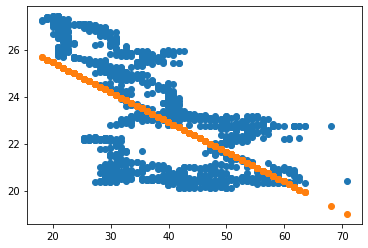

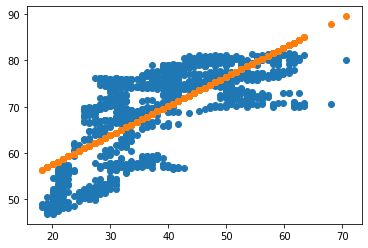

In [5]:
from sklearn.linear_model import LinearRegression
regr = LinearRegression()

X = pd.DataFrame(df_CC_CUT["pm25_df"])
y = pd.DataFrame(df_CC_CUT["temperatura"])

#regr.fit(df_CC_CUT[["pm25_df","temperatura"]])
regr.fit(X.iloc[:,:], y.iloc[:,:])
print("Coefficients: ", regr.coef_)
print("Intercept: ", regr.intercept_)
a=regr.coef_[0][0]
c=regr.intercept_[0]
df_CC_CUT["temperatura2"]=a*df_CC_CUT["pm25_df"]+c
df_CC_CUT
plt.figure()
plt.scatter(df_CC_CUT.pm25_df,df_CC_CUT.temperatura)
plt.scatter(df_CC_CUT.pm25_df,df_CC_CUT.temperatura2)


regr = LinearRegression()

X = pd.DataFrame(df_CC_CUT["pm25_df"])
y = pd.DataFrame(df_CC_CUT["humedad_relativa"])

#regr.fit(df_CC_CUT[["pm25_df","temperatura"]])
regr.fit(X.iloc[:,:], y.iloc[:,:])
print("Coefficients: ", regr.coef_)
print("Intercept: ", regr.intercept_)
a=regr.coef_[0][0]
c=regr.intercept_[0]
df_CC_CUT["humedad_relativa2"]=a*df_CC_CUT["pm25_df"]+c
df_CC_CUT
plt.figure()
plt.scatter(df_CC_CUT.pm25_df,df_CC_CUT.humedad_relativa)
plt.scatter(df_CC_CUT.pm25_df,df_CC_CUT.humedad_relativa2)

POLYNOMIAL REGRESSION

Coefficients for Temperature:  [[ 0.0000000e+00 -1.3372504e+00  2.6521955e-02 -1.7845631e-04]]
Intercept:  [44.785454]
Coefficients for Humidity:  [[ 0.0000000e+00  4.4629354e+00 -7.4900344e-02  4.1961670e-04]]
Intercept:  [-12.343803]


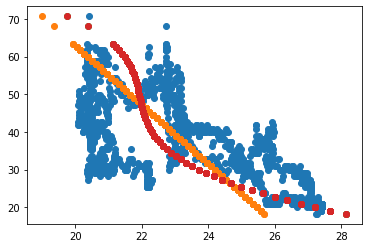

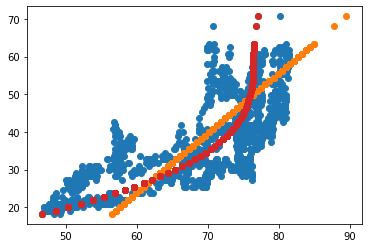

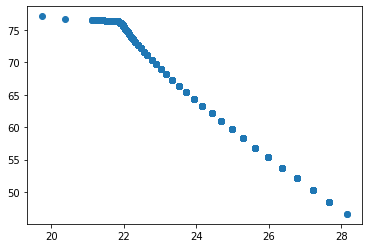

In [6]:

from sklearn.preprocessing import PolynomialFeatures

X = pd.DataFrame(df_CC_CUT["pm25_df"])
y = pd.DataFrame(df_CC_CUT["temperatura"])
order=3
poly = PolynomialFeatures(degree = order)
X_poly = poly.fit_transform(X)
poly.fit(X_poly, y)
lin2 = LinearRegression()
lin2.fit(X_poly, y)
model=lin2.fit(X_poly, y)
print("Coefficients for Temperature: ", model.coef_)
print("Intercept: ", model.intercept_)

df_CC_CUT["temperatura3"]=lin2.predict(poly.fit_transform(X))
td=model.coef_[0][0] #0.0000000e+00
tc=model.coef_[0][1] #-1.3372504e+00
tb=model.coef_[0][2] #2.6521955e-02
ta=model.coef_[0][3] #-1.7845631e-04
te=model.intercept_[0] #44.785454

df_CC_CUT["temperatura4"]=ta*df_CC_CUT["pm25_df"]**3+tb*df_CC_CUT["pm25_df"]**2+tc*df_CC_CUT["pm25_df"]+td+te

plt.figure()
plt.scatter(df_CC_CUT.temperatura,df_CC_CUT.pm25_df)
plt.scatter(df_CC_CUT.temperatura2,df_CC_CUT.pm25_df)
plt.scatter(df_CC_CUT.temperatura3,df_CC_CUT.pm25_df)
plt.scatter(df_CC_CUT.temperatura4,df_CC_CUT.pm25_df)

X = pd.DataFrame(df_CC_CUT["pm25_df"])
y = pd.DataFrame(df_CC_CUT["humedad_relativa"])

poly = PolynomialFeatures(degree = order)
X_poly = poly.fit_transform(X)
 
poly.fit(X_poly, y)
lin2 = LinearRegression()
lin2.fit(X_poly, y)
model=lin2.fit(X_poly, y)
print("Coefficients for Humidity: ", model.coef_)
print("Intercept: ", model.intercept_)
df_CC_CUT["humedad_relativa3"]=lin2.predict(poly.fit_transform(X))

hd=model.coef_[0][0] #0.0000000e+00
hc=model.coef_[0][1] #4.4629354e+00
hb=model.coef_[0][2] #-7.4900344e-02
ha=model.coef_[0][3] #4.1961670e-04
he=model.intercept_[0] #-12.343803

df_CC_CUT["humedad_relativa4"]=ha*df_CC_CUT["pm25_df"]**3+hb*df_CC_CUT["pm25_df"]**2+hc*df_CC_CUT["pm25_df"]+hd+he

plt.figure()
plt.scatter(df_CC_CUT.humedad_relativa,df_CC_CUT.pm25_df)
plt.scatter(df_CC_CUT.humedad_relativa2,df_CC_CUT.pm25_df)
plt.scatter(df_CC_CUT.humedad_relativa3,df_CC_CUT.pm25_df)
plt.scatter(df_CC_CUT.humedad_relativa4,df_CC_CUT.pm25_df)
plt.figure()
plt.scatter(df_CC_CUT.temperatura3,df_CC_CUT.humedad_relativa3)

BASED ON THE POLYNOMIAL MODEL, NOW WE GET OUR FINAL 1-DAY DATASET AS FOLLOWS

      codigoSerial fecha hora           fechaHora  temperatura  \
4316            67   NaN  NaN 2021-10-07 23:56:00    22.321622   
4317            67   NaN  NaN 2021-10-07 23:57:00    22.324347   
4318            67   NaN  NaN 2021-10-07 23:58:00    22.327406   
4319            67   NaN  NaN 2021-10-07 23:59:00    22.330810   
4320            67   NaN  NaN 2021-10-08 00:00:00    22.336075   

      humedad_relativa pm1_df pm10_df    pm25_df pm1_nova pm10_nova  \
4316         73.106328    NaN     NaN  39.831962      NaN       NaN   
4317         73.088124    NaN     NaN  39.795131      NaN       NaN   
4318         73.067726    NaN     NaN  39.754023      NaN       NaN   
4319         73.045073    NaN     NaN  39.708567      NaN       NaN   
4320         73.010105    NaN     NaN  39.638802      NaN       NaN   

      pm25_nova calidad_temperatura calidad_humedad_relativa calidad_pm1_df  \
4316  39.831962                 NaN                      NaN            NaN   
4317  39.795131   

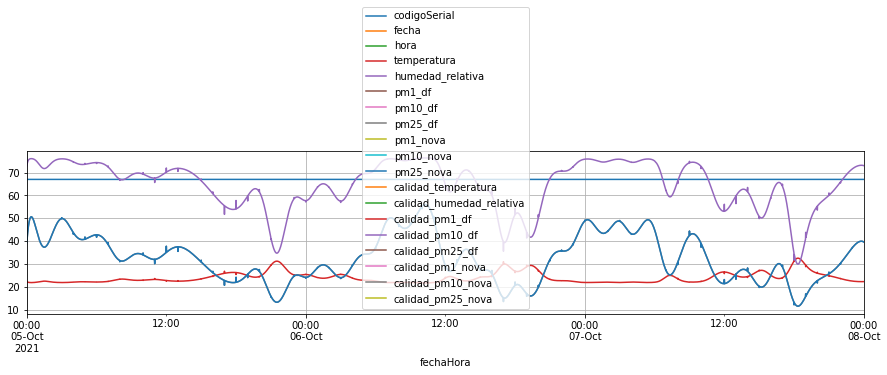

In [7]:
df_CC["pm25_nova"]=df_CC["pm25_df"]
df_CC["temperatura"]=         ta*df_CC["pm25_df"]**3  +  tb*df_CC["pm25_df"]**2  +  tc*df_CC["pm25_df"]  +  td  +  te
df_CC["humedad_relativa"]=    ha*df_CC["pm25_df"]**3  +  hb*df_CC["pm25_df"]**2  +  hc*df_CC["pm25_df"]  +  hd  +  he
df_CC.pop("pm25")
df_CC["codigoSerial"]=67
print(df_CC.tail(5))

df_CC_aux=df_CC
df_CC_aux=df_CC_aux.set_index("fechaHora",inplace=False)


df_CC_aux.plot(figsize=(15,3))
plt.grid()
plt.show()


In [8]:
print(df_CC.head(1),"\n")
print(df_CC.tail(1))
df_CC

   codigoSerial fecha hora  fechaHora  temperatura  humedad_relativa pm1_df  \
0            67   NaN  NaN 2021-10-05    22.357266         72.870355    NaN   

  pm10_df  pm25_df pm1_nova pm10_nova  pm25_nova calidad_temperatura  \
0     NaN  39.3647      NaN       NaN    39.3647                 NaN   

  calidad_humedad_relativa calidad_pm1_df calidad_pm10_df calidad_pm25_df  \
0                      NaN            NaN             NaN             NaN   

  calidad_pm1_nova calidad_pm10_nova calidad_pm25_nova  
0              NaN               NaN               NaN   

      codigoSerial fecha hora  fechaHora  temperatura  humedad_relativa  \
4320            67   NaN  NaN 2021-10-08    22.336075         73.010105   

     pm1_df pm10_df    pm25_df pm1_nova pm10_nova  pm25_nova  \
4320    NaN     NaN  39.638802      NaN       NaN  39.638802   

     calidad_temperatura calidad_humedad_relativa calidad_pm1_df  \
4320                 NaN                      NaN            NaN   

     cal

,codigoSerial,fecha,hora,fechaHora,temperatura,humedad_relativa,pm1_df,pm10_df,pm25_df,pm1_nova,pm10_nova,pm25_nova,calidad_temperatura,calidad_humedad_relativa,calidad_pm1_df,calidad_pm10_df,calidad_pm25_df,calidad_pm1_nova,calidad_pm10_nova,calidad_pm25_nova
0,67,NaN,NaN,2021-10-05 00:00:00,22.357266,72.870355,NaN,NaN,39.364700,NaN,NaN,39.364700,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,67,NaN,NaN,2021-10-05 00:01:00,22.275232,73.420481,NaN,NaN,40.490237,NaN,NaN,40.490237,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,67,NaN,NaN,2021-10-05 00:02:00,22.210011,73.877450,NaN,NaN,41.536592,NaN,NaN,41.536592,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,67,NaN,NaN,2021-10-05 00:03:00,22.157665,74.258943,NaN,NaN,42.512431,NaN,NaN,42.512431,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,67,NaN,NaN,2021-10-05 00:04:00,22.115424,74.577215,NaN,NaN,43.420205,NaN,NaN,43.420205,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4316,67,NaN,NaN,2021-10-07 23:56:00,22.321622,73.106328,NaN,NaN,39.831962,NaN,NaN,39.831962,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4317,67,NaN,NaN,2021-10-07 23:57:00,22.324347,73.088124,NaN,NaN,39.795131,NaN,NaN,39.795131,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4318,67,NaN,NaN,2021-10-07 23:58:00,22.327406,73.067726,NaN,NaN,39.754023,NaN,NaN,39.754023,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4319,67,NaN,NaN,2021-10-07 23:59:00,22.330810,73.045073,NaN,NaN,39.708567,NaN,NaN,39.708567,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


SAVE THE dataset

In [9]:
#CC=pd.DataFrame(columns=['codigoSerial',"fechaHora", 'pm25_df', 'pm25_nova', 'temperatura', 'humedad_relativa'])
#header_CC=["codigoSerial", "fecha", "hora", "fechaHora", "temperatura", "humedad_relativa", "pm1_df", "pm10_df", "pm25_df", "pm1_nova", "pm10_nova", "pm25_nova", "calidad_temperatura", "calidad_humedad_relativa", "calidad_pm1_df", "calidad_pm10_df", "calidad_pm25_df", "calidad_pm1_nova", "calidad_pm10_nova", "calidad_pm25_nova"]


df_CC.to_csv("C:/Users/julio/Documents/UDEA/Maestría/DQ in IOT/Datasets/Dataset for testing/Synthetic/"+"CC_Synthetic2.csv",header=False,index=False)

In [10]:
header_CC=["codigoSerial", "fecha", "hora", "fechaHora", "temperatura", "humedad_relativa", "pm1_df", "pm10_df", "pm25_df", "pm1_nova", "pm10_nova", "pm25_nova", "calidad_temperatura", "calidad_humedad_relativa", "calidad_pm1_df", "calidad_pm10_df", "calidad_pm25_df", "calidad_pm1_nova", "calidad_pm10_nova", "calidad_pm25_nova"]
CC=pd.DataFrame(columns=header_CC)
for node in range (1,11):
    #print(node)
    df_CC["codigoSerial"]=node
    CC=CC.append(df_CC, ignore_index = True)
        

CC.to_csv("C:/Users/julio/Documents/UDEA/Maestría/DQ in IOT/Datasets/Dataset for testing/Synthetic/"+"CC_Synthetic2.csv",header=False,index=False)

In [9]:
#0. Clean the whole dataset (the variables of interest):
import pandas as pd
import numpy as np
#Read Data from February
header_CC=["codigoSerial", "fecha", "hora", "fechaHora", "temperatura", "humedad_relativa", "pm1_df", "pm10_df", "pm25_df", "pm1_nova", "pm10_nova", "pm25_nova", "calidad_temperatura", "calidad_humedad_relativa", "calidad_pm1_df", "calidad_pm10_df", "calidad_pm25_df", "calidad_pm1_nova", "calidad_pm10_nova", "calidad_pm25_nova"]
datatypes_CC={"codigoSerial":np.uint16, "temperatura":np.float16, "humedad_relativa":np.float16, "pm1_df":np.float32, "pm10_df":np.float32, "pm25_df":np.float32, "pm1_nova":np.float32, "pm10_nova":np.float32, "pm25_nova":np.float32}
df_CC = pd.read_csv("C:/Users/julio/Documents/UDEA/Maestría/DQ in IOT/Datasets/Dataset for testing/Synthetic/"+"CC_Synthetic2.csv", header=None, names=header_CC, usecols=header_CC , dtype=datatypes_CC,parse_dates=["fecha","hora","fechaHora"])
df_CC.sort_values(by=['codigoSerial','fechaHora'],ignore_index=True)

#Data includes January, February and March
header_SS=["Fecha_Hora","codigoSerial","pm25","calidad_pm25","pm10","calidad_pm10"]
datatypes_SS={"codigoSerial":np.uint16,"pm25":np.float32,"pm10":np.float32}
df_SS = pd.read_csv("C:/Users/julio/Documents/UDEA/Maestría/DQ in IOT/Datasets/Dataset for testing/Synthetic/"+"SS_Synthetic_2.csv", header=None,names=header_SS, usecols=header_SS , dtype=datatypes_SS,parse_dates=["Fecha_Hora"], 
            dayfirst=True)
df_SS.sort_values(by=['codigoSerial','Fecha_Hora'],ignore_index=True)

def clean_sort_data(df_CC, df_SS):
    
    #ClEAN AND SORT THE CITIZEN SCIENCE DATASET
    #Remove outliers that are out of range, from documentation both nova and df range of measurements are [0,999], [-40,70], [1,100]
    #For PM2.5, Temperature and Relative Humidity Respectively.
    df_CC=df_CC.copy()
    df_CC.loc[df_CC["pm25_nova"]>999,"pm25_nova"]=np.nan
    df_CC.loc[df_CC["pm25_nova"]<0,"pm25_nova"]=np.nan
    df_CC.loc[df_CC["pm25_df"]>999,"pm25_df"]=np.nan
    df_CC.loc[df_CC["pm25_df"]<0,"pm25_df"]=np.nan
    df_CC.loc[df_CC["temperatura"]>70,"temperatura"]=np.nan
    df_CC.loc[df_CC["temperatura"]<-40,"temperatura"]=np.nan
    df_CC.loc[df_CC["humedad_relativa"]>100,"humedad_relativa"]=np.nan
    df_CC.loc[df_CC["humedad_relativa"]<1,"humedad_relativa"]=np.nan

    
    #Remove data above the whiskers of the boxplot: i.e. anomaly data
    Q1 = df_CC['pm25_df'].quantile(0.25)
    Q3 = df_CC['pm25_df'].quantile(0.75)
    IQR = Q3 - Q1    #IQR is interquartile range. 
    df_CC.loc[df_CC["pm25_df"]>=Q3 + 1.5 *IQR,"pm25_df"]=np.nan
    
    Q1 = df_CC['pm25_nova'].quantile(0.25)
    Q3 = df_CC['pm25_nova'].quantile(0.75)
    IQR = Q3 - Q1    #IQR is interquartile range. 
    df_CC.loc[df_CC["pm25_nova"]>=Q3 + 1.5 *IQR,"pm25_nova"]=np.nan
    
    Q1 = df_CC['temperatura'].quantile(0.25)
    Q3 = df_CC['temperatura'].quantile(0.75)
    IQR = Q3 - Q1    #IQR is interquartile range. 
    df_CC.loc[df_CC["temperatura"]>=Q3 + 1.5 *IQR,"temperatura"]=np.nan
    
    Q1 = df_CC['humedad_relativa'].quantile(0.25)
    Q3 = df_CC['humedad_relativa'].quantile(0.75)
    IQR = Q3 - Q1    #IQR is interquartile range. 
    df_CC.loc[df_CC["humedad_relativa"]>=Q3 + 1.5 *IQR,"humedad_relativa"]=np.nan
    
    #CREATE A DICTINARY CONTAINING THE DATASETS PER NODE
    grouped=df_CC.groupby(df_CC.codigoSerial)
    CC={}
    print("Citizen Scientist: ", sorted(list(df_CC.codigoSerial.unique())))
    for i in df_CC.codigoSerial.unique():
        CC[i] = grouped.get_group(i).sort_values(by=['fechaHora'],ignore_index=True)
    
    #ClEAN AND SORT THE SIATA STATIONS DATASET
    #Remove outliers that are out of range, from documentation both nova and df range of measurements are [0,999]
    df_SS=df_SS.copy()
    df_SS.loc[df_SS["pm25"]>999,"pm25"]=np.nan
    df_SS.loc[df_SS["pm25"]<0,"pm25"]=np.nan

    
    #Remove data above the whiskers of the boxplot: i.e. anomaly data
    Q1 = df_SS['pm25'].quantile(0.25)
    Q3 = df_SS['pm25'].quantile(0.75)
    IQR = Q3 - Q1    #IQR is interquartile range. 
    df_SS.loc[df_SS["pm25"]>=Q3 + 1.5 *IQR,"pm25"]=np.nan
    
    #CREATE A DICTINARY CONTAINING THE DATASETS PER SIATA STATION
    grouped=df_SS.groupby(df_SS.codigoSerial)
    SS={}
    print("Siata Stations: ", list(df_SS.codigoSerial.unique()))
    for j in df_SS.codigoSerial.unique():
        SS[j] = grouped.get_group(j).sort_values(by=['Fecha_Hora'],ignore_index=True)
    
    del grouped
    return CC, SS
CC, SS=clean_sort_data(df_CC, df_SS)
del df_CC
del df_SS

datatypesDistances={"codigoSerial_CC":np.uint16,"codigoSerial_ES":np.uint16,"Distancia_a_ES":np.float16,"codigoSerial_ES2":np.uint16}
Distances = pd.read_csv("C:/Users/julio/Documents/UDEA/Maestría/DQ in IOT/Datasets/Dataset for testing/Synthetic/"+"Distancias_Synthetic_2.csv", header=0, dtype=datatypesDistances,index_col="codigoSerial_CC")

#arguments=[nodes=10, CC=CC, SS=CC, Distances=Distances, start_time=start_time, end_time=end_time]
from datetime import datetime, timedelta


#Precision
def precision(window):

    prec_df=1-(window['pm25_df'].std()/window['pm25_df'].mean())# 1-Coefficient of Variation (std/mean)
    prec_nova=1-(window['pm25_nova'].std()/window['pm25_nova'].mean())# 1-Coefficient of Variation (std/mean)
    prec_dict_time={"precision_df_time":prec_df,"precision_nova_time":prec_nova}
    return prec_dict_time


#Uncertainty
def uncertainty(window):
    uncert=1-np.sqrt((window.pm25_df-window.pm25_nova).pow(2).mean()/2)/((window.pm25_df+window.pm25_nova).mean()/2)
    uncer_dict_time={"uncertainty_time":uncert}
    return uncer_dict_time   


#ACCURACY
def accuracy(node,hour, window, Distances, SS):
    
    pm25_df_ave=window['pm25_df'].mean()
    pm25_nova_ave=window['pm25_nova'].mean()
    #print(pm25_df_ave, pm25_nova_ave)
    Closest_Station=Distances.codigoSerial_ES.loc[node]    
    Closest_Station2=Distances.codigoSerial_ES.loc[node] 
    #print(pm25_df_ave,pm25_nova_ave,Closest_Station,Closest_Station2)
    #print(Closest_Station in SS.keys())
    #print(hour in SS[Closest_Station].Fecha_Hora.values, hour)
   # print(SS[Closest_Station].Fecha_Hora)
    
    if (Closest_Station in SS.keys()) and (hour in SS[Closest_Station].Fecha_Hora.values):
        
        #print(SS[Closest_Station])
        #df_window.loc[df_window["fechaHora"]==ts,'pm25_nova_ave']
        v=SS[Closest_Station].loc[SS[Closest_Station].Fecha_Hora==hour,"pm25"].values[0]
        #print()
        #print(pm25_df_ave)
        accur_df=  max(0,1-abs(pm25_df_ave-v)/v)
        accur_nova= max(0,1-abs(pm25_nova_ave-v)/v)
    
    elif (Closest_Station2 in SS.keys()) and  (hour in SS[Closest_Station2].Fecha_Hora.values):
        
        v=SS[Closest_Station2].loc[SS[Closest_Station2].Fecha_Hora==hour,"pm25"].values[0]
        #v=SS[Closest_Station2].loc[hour,"pm25"]
        accur_df=  max(0,1-abs(pm25_df_ave-v)/v)
        accur_nova= max(0,1-abs(pm25_nova_ave-v)/v)
    else:
        accur_df=np.nan
        accur_nova=np.nan
    accu_dict_time={'accuracy_df_time':accur_df, 'accuracy_nova_time':accur_nova}
    return accu_dict_time


#CONCORDANCE
def concordance(node, hour, window, Distances, SS):
    Closest_Station=Distances.codigoSerial_ES.loc[node]
    Closest_Station2=Distances.codigoSerial_ES.loc[node]
    window=window.copy()
    #window.loc[:,'v_pm25']=np.nan
    if (Closest_Station in SS.keys()) and (hour in SS[Closest_Station].Fecha_Hora.values):
        
        #window.loc[window[,"v_pm25"]=np.nan
        
        #v=SS[Closest_Station].loc[SS[Closest_Station].Fecha_Hora==hour,"pm25"].values[0]
        #window.loc[:,'v_pm25']=v
        
        v=SS[Closest_Station].loc[SS[Closest_Station].Fecha_Hora==hour,"pm25"].values[0]
        window.loc[:,"v_pm25"]=v
        
        corr_df =   window.loc[:,["pm25_df","pm25_nova","v_pm25","temperatura","humedad_relativa"]].corr().iloc[0].abs()
        corr_nova = window.loc[:,["pm25_df","pm25_nova","v_pm25","temperatura","humedad_relativa"]].corr().iloc[1].abs()
        concordance_df_nova=corr_df.pm25_nova
        concordance_df_siata=corr_df.v_pm25
        concordance_df_hum=corr_df.humedad_relativa
        concordance_df_temp=corr_df.temperatura
        concordance_nova_siata=corr_nova.v_pm25
        concordance_nova_hum=corr_nova.humedad_relativa
        concordance_nova_temp=corr_nova.temperatura
   
            
    elif (Closest_Station2 in SS.keys()) and (hour in SS[Closest_Station2].Fecha_Hora.values):
        
        v=SS[Closest_Station2].loc[SS[Closest_Station2].Fecha_Hora==hour,"pm25"].values[0]
        window.loc[:,"v_pm25"]=v
        
        corr_df =   window.loc[:,["pm25_df","pm25_nova","v_pm25","temperatura","humedad_relativa"]].corr().iloc[0].abs()
        corr_nova = window.loc[:,["pm25_df","pm25_nova","v_pm25","temperatura","humedad_relativa"]].corr().iloc[1].abs()
        concordance_df_nova=corr_df.pm25_nova
        concordance_df_siata=corr_df.v_pm25
        concordance_df_hum=corr_df.humedad_relativa
        concordance_df_temp=corr_df.temperatura
        concordance_nova_siata=corr_nova.v_pm25
        concordance_nova_hum=corr_nova.humedad_relativa
        concordance_nova_temp=corr_nova.temperatura
    else:
        concordance_df_nova=np.nan
        concordance_df_siata=np.nan
        concordance_df_hum=np.nan
        concordance_df_temp=np.nan
        concordance_nova_siata=np.nan
        concordance_nova_hum=np.nan
        concordance_nova_temp=np.nan
       
    conco_dict={"concordance_df_nova_time":concordance_df_nova,
                "concordance_df_siata":concordance_df_siata,
                "concordance_df_hum_time":concordance_df_hum,
                "concordance_df_temp_time":concordance_df_temp,
                "concordance_nova_siata":concordance_nova_siata,
                "concordance_nova_hum_time":concordance_nova_hum,
                "concordance_nova_temp_time":concordance_nova_temp}
    return conco_dict


#COMPLETENESS
def completeness(node, window,start_time, end_time):
    
    if window.fechaHora.min()==start_time and window.fechaHora.max()==end_time:
        ref_date_range = pd.DataFrame(pd.date_range(start_time,end_time, freq='1Min'),columns=["ref_fechaHora"])
    
    elif window.fechaHora.min()==start_time:
        ref_date_range = pd.DataFrame(pd.date_range(start_time, pd.Timestamp(start_time).ceil('60min')-timedelta(minutes=1), freq='1Min'),columns=["ref_fechaHora"])
        
    elif window.fechaHora.max()==end_time:
        ref_date_range = pd.DataFrame(pd.date_range(pd.Timestamp(end_time).floor('60min')-timedelta(minutes=1),pd.Timestamp(end_time), freq='1Min'),columns=["ref_fechaHora"])
    
    else:
        ref_date_range = pd.DataFrame(pd.date_range(window.fechaHora.min().floor('60min'),window.fechaHora.min().floor('60min')+timedelta(minutes=59), freq='1Min'),columns=["ref_fechaHora"])
        
    #Check for any missing date
    missing_dates = ref_date_range.loc[~ref_date_range.ref_fechaHora.isin(window.fechaHora),"ref_fechaHora"]
    
    #Add missing date rows
    for missing in missing_dates:
        window=window.append({"codigoSerial":node,"fechaHora":missing}, ignore_index = True)
    #Check for missing data
    missing_data_df=np.count_nonzero(np.isnan(window['pm25_df']))
    missing_data_nova=np.count_nonzero(np.isnan(window['pm25_nova']))
    comp_df=(1-missing_data_df/np.size(window.pm25_df))
    comp_nova=(1-missing_data_nova/np.size(window.pm25_nova))
    comp_dict_time={'completeness_df_time':comp_df, 'completeness_nova_time':comp_nova}        
    return comp_dict_time



def eval_dq(arguments):
    nodes=arguments[0]
    CC=arguments[1]
    SS=arguments[2]
    Distances=arguments[3]
    start_time=arguments[4]
    end_time=arguments[5]
    
    #1. For each citizen science (CC) node, get the groups (HOURLY GROUPS).
    #node_dataset=CC[nodes]
    node_dataset=CC[nodes][(CC[nodes]['fechaHora'] >= start_time) & (CC[nodes]['fechaHora'] <= end_time)]
    #print(node_dataset)
    #times = pd.to_datetime(node_dataset.fechaHora)
    hourly_groups=node_dataset.groupby([node_dataset.fechaHora.dt.floor('60min')])#Para agrupar por cada hora
    hourly_groups.groups.keys()# O grupos.groups para obtener las claves de cada grupo, es decir cada hora
    del node_dataset
    

    dim_time = pd.DataFrame(
        columns =["codigoSerial",
                  "fechaHora",
                  "precision_df_time",
                  "precision_nova_time",
                  "uncertainty_time",
                  "accuracy_df_time",
                  "accuracy_nova_time",
                  "completeness_df_time",
                  "completeness_nova_time",
                  
                  "concordance_df_nova_time",
                  
                  "concordance_df_siata",#MAYBE NEED TO BE CALCULATED ON A DAILY BASIS
                  "concordance_df_hum_time",
                  "concordance_df_temp_time",
                  
                  "concordance_nova_siata",#MAYBE NEED TO BE CALCULATED ON A DAILY BASIS
                  "concordance_nova_hum_time",
                  "concordance_nova_temp_time"])
    
    #2. For each group (hour in a CC node data), calculate the Dimension's DQ. (The functions should be applied to each group instead)
    for hour in hourly_groups.groups.keys():
        window=hourly_groups.get_group(hour)
        #window['v_pm25']=np.nan
        
        preci_dict_time=precision(window)
        uncer_dict_time=uncertainty(window)
        accur_dict_time=accuracy(nodes, hour, window, Distances, SS)
        conco_dict_time=concordance(nodes, hour, window, Distances, SS)
        comp_dict_time=completeness(nodes, window,start_time, end_time)
        
        DQ_dict_time={"codigoSerial":nodes,"fechaHora":hour}
        DQ_dict_time.update(preci_dict_time)
        DQ_dict_time.update(uncer_dict_time)
        DQ_dict_time.update(accur_dict_time)
        DQ_dict_time.update(conco_dict_time)
        DQ_dict_time.update(comp_dict_time)
        
        
        #3. Save the result file in the form: Node, Group (hour), DQ_1, DQ_2, DQ3, ... , DQIndex  (This is new)
        dim_time=dim_time.append(DQ_dict_time, ignore_index = True)
    
    return dim_time


Citizen Scientist:  [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
Siata Stations:  [90]


In [10]:
start_time ="2021-10-05 00:00:00"
end_time   ="2021-10-07 23:59:00"
OUTPUT=eval_dq([2,CC,SS,Distances,start_time,end_time])
OUTPUT

,codigoSerial,fechaHora,precision_df_time,precision_nova_time,uncertainty_time,accuracy_df_time,accuracy_nova_time,completeness_df_time,completeness_nova_time,concordance_df_nova_time,concordance_df_siata,concordance_df_hum_time,concordance_df_temp_time,concordance_nova_siata,concordance_nova_hum_time,concordance_nova_temp_time
0,2,2021-10-05 00:00:00,0.934515,0.934515,1.0,0.804683,0.804683,1.0,1.0,1.0,NaN,0.978164,0.980049,NaN,0.978164,0.980049
1,2,2021-10-05 01:00:00,0.968363,0.968363,1.0,0.926505,0.926505,1.0,1.0,1.0,NaN,0.998232,0.996075,NaN,0.998232,0.996075
2,2,2021-10-05 02:00:00,0.937718,0.937718,1.0,0.861774,0.861774,1.0,1.0,1.0,NaN,0.986655,0.988137,NaN,0.986655,0.988137
3,2,2021-10-05 03:00:00,0.958720,0.958720,1.0,0.947390,0.947390,1.0,1.0,1.0,NaN,0.993240,0.994265,NaN,0.993240,0.994265
4,2,2021-10-05 04:00:00,0.978255,0.978255,1.0,0.963223,0.963223,1.0,1.0,1.0,NaN,0.997942,0.993807,NaN,0.997942,0.993807
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
67,2,2021-10-07 19:00:00,0.898775,0.898775,1.0,0.832833,0.832833,1.0,1.0,1.0,NaN,0.999105,0.998506,NaN,0.999105,0.998506
68,2,2021-10-07 20:00:00,0.963680,0.963680,1.0,0.885946,0.885946,1.0,1.0,1.0,NaN,0.999559,0.999107,NaN,0.999559,0.999107
69,2,2021-10-07 21:00:00,0.951563,0.951563,1.0,0.949983,0.949983,1.0,1.0,1.0,NaN,0.999252,0.998614,NaN,0.999252,0.998614
70,2,2021-10-07 22:00:00,0.941104,0.941104,1.0,0.877711,0.877711,1.0,1.0,1.0,NaN,0.997673,0.995612,NaN,0.997673,0.995612
